In [2]:
pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14065 sha256=6ef1053359dcdee8e0fbe2cca5139f6c48befbb205c76e5ba37b8e6172815065
  Stored in directory: /Users/user/Library/Caches/pip/wheels/ed/8a/c6/40c7ec06c2dd3df636832537238128a1471bf9c1b6a3a9bf40
Successfully built pytesseract
Note: you may need to restart the kernel to use updated packages.


In [58]:
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import cv2
import re
from PIL import Image
import requests
from pytesseract import Output

In [61]:
img=Image.open(requests.get("https://i.stack.imgur.com/pbIdS.png",stream=True).raw)

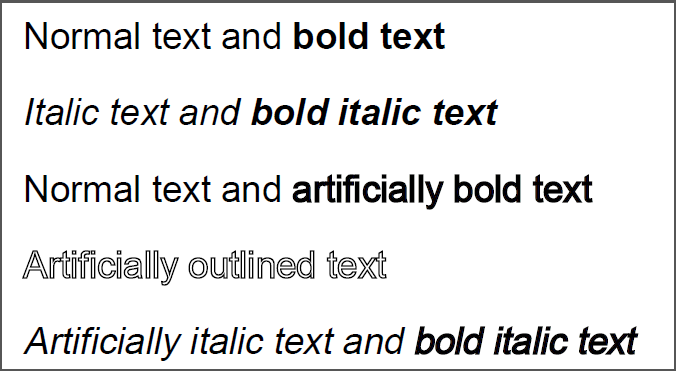

In [62]:
img

In [34]:
strings=pytesseract.image_to_string(img)

In [35]:
print(strings)
#suppose we get unwanted text
strings=strings+"!(fsdf)@—*“>+-/sdfsdf,'|£#%$sdfs&^_~"

 

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text

 



In [36]:
print(strings)

 

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text

 
!(fsdf)@—*“>+-/sdfsdf,'|£#%$sdfs&^_~


In [51]:
#so to remove unwanted text
characters_to_remove = "!()@—*“>+-/,'|£#%$&^_~"
for character in characters_to_remove:
    strings=strings.replace(character,"")
print(strings)
    

 

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text

 
fsdfsdfsdfsdfs


### Now we will perform opencv operations to get text from complex images

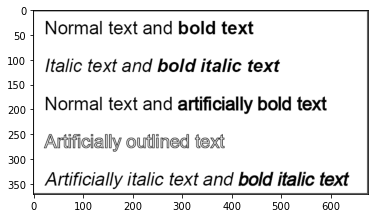

In [90]:
#Option 1 Gray scale image
image=np.array(img)
grayImage=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(grayImage,cmap="gray")

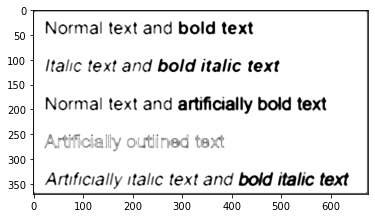

In [91]:
#Option 2 Remove noise
bluredImage=cv2.medianBlur(grayImage,5)
plt.imshow(bluredImage,cmap="gray")

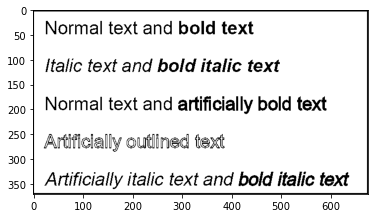

In [95]:
#Option 3 Threshold transformation
treshImage=cv2.threshold(grayImage,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
plt.imshow(treshImage,cmap="gray")

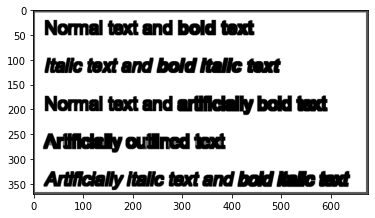

In [96]:
#Option 4 erode tansformation
erodedImage=cv2.erode(grayImage,np.ones((5,5),np.uint8),iterations=1)
plt.imshow(erodedImage,cmap="gray")

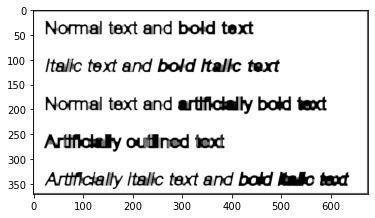

In [97]:
#Option 5 Morphological tansformation
openingImage=cv2.morphologyEx(grayImage,cv2.MORPH_OPEN,np.ones((5,5),np.uint8))
plt.imshow(openingImage,cmap="gray")

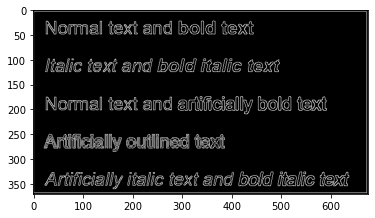

In [99]:
#Option 6 Cany edge detection
edgeImage=cv2.Canny(grayImage,100,200)
plt.imshow(edgeImage,cmap="gray")

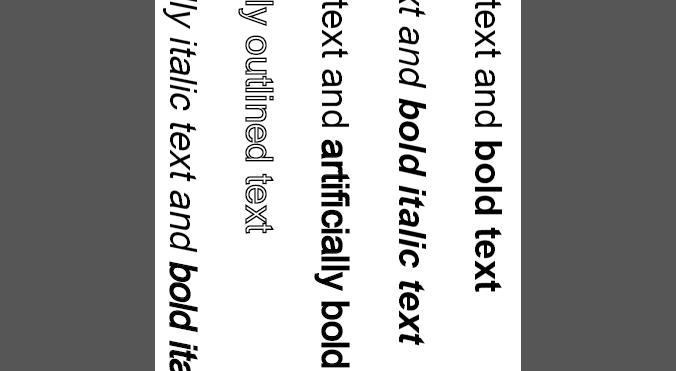

In [105]:
#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated
rotated = deskew(grayImage)
Image.fromarray(rotated)

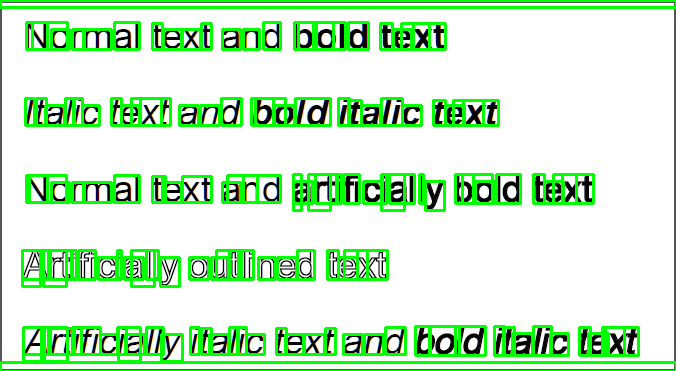

In [107]:
# Drawing rectangle around text
img = cv2.imread('sample.png')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)

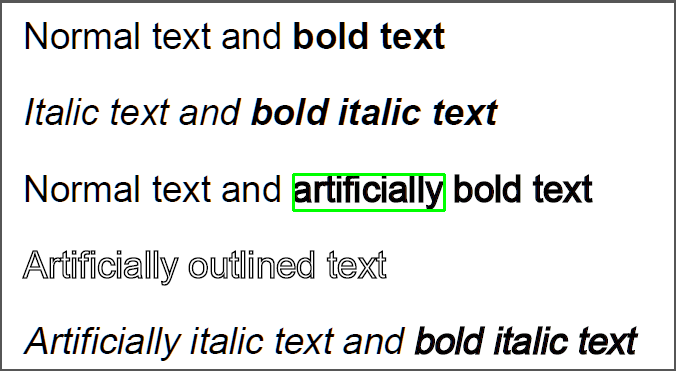

In [116]:
# Drawing pattern on specific pattern or word
img = cv2.imread('sample.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())
date_pattern = 'artificially'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
Image.fromarray(img)